**Predicción de precios de Inmuebles en C.A.B.A mediante técnicas de aprendizaje automático**



Los precios del mercado inmobiliario de la Ciudad Autónoma de Buenos Aires son variados y surgen
como una consecuencia de muchos factores, presentando el desafio de determinar que valor resulta
adecuado para un inmueble. En este trabajo se recolectaron datos de inmuebles de la Ciudad de
Buenos Aires publicados en el sitio https://data.buenosaires.gob.ar/dataset/mercado-inmobiliario y se utilizó para
entrenar modelos de aprendizaje automático que permitan estimar los precios de las propiedades
determinando las caracteríısticas más importantes para este fin.

El dataset utilizado para este proyecto se puede encontrar en este link. https://docs.google.com/spreadsheets/d/120bbEF6W51y5nJxnxZ2zYjQGZ5cCc1X7gXBdL394wiI/edit#gid=531073713

La adquisición de un inmueble representa una inversión significativa y un hito en la vida de la mayoría de las personas, debido a la importancia de la compra y a las grandes sumas de dinero que se deben afrontar. Basta con hacer una rápida búsqueda en inmobiliarias o sitios web de propiedades para darse cuenta de la diversidad de características y precios disponibles. Algunas diferencias en las características de los inmuebles pueden hacer que la influencia en el precio parezca obvia. No obstante, existen numerosas variables que un vendedor puede considerar al establecer el precio de su propiedad, lo que puede llevar a conclusiones premeditadas. Estas variables pueden ser inherentes al inmueble, estar relacionadas con su ubicación geográfica o basarse en referencias de propiedades similares, así como en la necesidad y urgencia del vendedor, entre otras consideraciones.

En última instancia, determinar el precio de un inmueble no es una tarea sencilla. Además, es importante tener en cuenta que, como cualquier mercado, el mercado inmobiliario experimenta fluctuaciones al alza y a la baja que están influenciadas por el contexto macroeconómico del país. En el caso de Argentina, las crisis económicas frecuentes añaden complejidad adicional, lo que complica aún más el análisis si se consideran datos históricos.

En cuanto a la importancia de una estimación precisa, esta radica en la perspectiva tanto del vendedor, que busca obtener el beneficio adecuado, como del comprador, que no desea pagar más de lo justo. Además, una buena estimación proporciona la capacidad de determinar si un inmueble tiene una valoración adecuada, si está sobrevalorado o si representa una oportunidad de inversión rentable debido a su precio más bajo.

Por lo tanto, habiendo considerado algunas de las complejidades de este problema, es necesario señalar que existen concepciones, quizás acertadas, sobre los valores de referencia de un inmueble. En particular, se suele asociar la ubicación y el tamaño de una vivienda como factores determinantes de su precio. De hecho, existen índices específicos que reflejan el valor por metro cuadrado de las propiedades por zona o barrio. En este trabajo se intentará verificar la validez de estas afirmaciones.

El objetivo general de este trabajo es predecir el precio del M2 inmuebles de la Ciudad Autónoma
de Buenos Aires siguiendo un proceso de descubrimiento de conocimiento. Para esto se definieron
tres objetivos específicos:
Obtener un Dataset con inmuebles en oferta en la Ciudad de Buenos Aires.
Efectuar limpieza del Dataset.
Ajustar modelos de predicción de precios a partir de las características que ofrezca el Dataset mediante una téncica de regresión basada en Aprendizaje Automático.

**OBTENCIÓN Y ANÁLISIS DEL DATASET**

In [ ]:
import pandas as pd

inmuebles = pd.read_csv('/content/precio-venta-deptos.xlsx - DESCARGAR - precio-venta-deptos.xlsx - DESCARGAR (1).csv')

inmuebles.head(10)

,barrio,año,trimestre,precio_prom,ambientes,estado,comuna
0,AGRONOMIA,2016,1,2018,2,Usado,15
1,AGRONOMIA,2016,2,2032,2,Usado,15
2,AGRONOMIA,2016,3,2095,2,Usado,15
3,AGRONOMIA,2016,4,2052,2,Usado,15
4,AGRONOMIA,2017,1,2140,2,Usado,15
5,AGRONOMIA,2017,2,2203,2,Usado,15
6,AGRONOMIA,2017,3,2303,2,Usado,15
7,ALMAGRO,2010,1,1574,2,Usado,5
8,ALMAGRO,2010,2,1610,2,Usado,5
9,ALMAGRO,2010,3,1665,2,Usado,5


In [ ]:
inmuebles.shape

(3085, 7)

In [ ]:
inmuebles.columns

Index(['barrio', 'año', 'trimestre', 'precio_prom', 'ambientes', 'estado',
       'comuna'],
      dtype='object')

In [ ]:
columnas = {'barrio':'BARRIO','año':'AÑO','trimestre':'TRIMESTRE', 'precio_prom':'PRECIO_USD', 'ambientes':'AMBIENTES', 'estado':'ESTADO',
       'comuna':'COMUNA'}
inmuebles = inmuebles.rename(columns=columnas)

In [ ]:
inmuebles.sample(10)

,BARRIO,AÑO,TRIMESTRE,PRECIO_USD,AMBIENTES,ESTADO,COMUNA
2513,BALVANERA,2017,2,2233,3,Nuevo,3
499,PALERMO,2013,2,2771,2,Usado,14
230,CABALLITO,2019,2,2780,2,Usado,6
562,PARQUE CHAS,2016,3,2303,2,Usado,15
1047,ALMAGRO,2017,4,2331,3,Usado,5
2837,RECOLETA,2016,1,3404,3,Nuevo,2
1345,FLORES,2014,2,1709,3,Usado,7
1647,PUERTO MADERO,2016,3,5526,3,Usado,1
1843,VELEZ SARSFIELD,2018,4,2119,3,Usado,10
372,FLORESTA,2018,3,2184,2,Usado,10


In [ ]:
inmuebles['AÑO'] = inmuebles['AÑO'].astype(float)

In [ ]:
inmuebles['TRIMESTRE'] = inmuebles['TRIMESTRE'].astype(float)

In [ ]:
inmuebles['PRECIO_USD'] = inmuebles['PRECIO_USD'].astype(float)

In [ ]:
inmuebles['AMBIENTES'] = inmuebles['AMBIENTES'].astype(float)

In [ ]:
inmuebles['COMUNA'] = inmuebles['COMUNA'].astype(float)

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BARRIO      3085 non-null   object 
 1   AÑO         3085 non-null   float64
 2   TRIMESTRE   3085 non-null   float64
 3   PRECIO_USD  3085 non-null   float64
 4   AMBIENTES   3085 non-null   float64
 5   ESTADO      3085 non-null   object 
 6   COMUNA      3085 non-null   float64
dtypes: float64(5), object(2)
memory usage: 168.8+ KB


In [ ]:
inmuebles.iloc[300]

BARRIO        CONSTITUCION
AÑO                 2016.0
TRIMESTRE              2.0
PRECIO_USD          1701.0
AMBIENTES              2.0
ESTADO               Usado
COMUNA                 1.0
Name: 300, dtype: object

In [ ]:
inmuebles.isnull().sum()

BARRIO        0
AÑO           0
TRIMESTRE     0
PRECIO_USD    0
AMBIENTES     0
ESTADO        0
COMUNA        0
dtype: int64

In [ ]:
inmuebles.value_counts

<bound method DataFrame.value_counts of              BARRIO     AÑO  TRIMESTRE  PRECIO_USD  AMBIENTES ESTADO  COMUNA
0         AGRONOMIA  2016.0        1.0      2018.0        2.0  Usado    15.0
1         AGRONOMIA  2016.0        2.0      2032.0        2.0  Usado    15.0
2         AGRONOMIA  2016.0        3.0      2095.0        2.0  Usado    15.0
3         AGRONOMIA  2016.0        4.0      2052.0        2.0  Usado    15.0
4         AGRONOMIA  2017.0        1.0      2140.0        2.0  Usado    15.0
...             ...     ...        ...         ...        ...    ...     ...
3080  VILLA URQUIZA  2018.0        2.0      3353.0        3.0  Nuevo    12.0
3081  VILLA URQUIZA  2018.0        3.0      3329.0        3.0  Nuevo    12.0
3082  VILLA URQUIZA  2018.0        4.0      3316.0        3.0  Nuevo    12.0
3083  VILLA URQUIZA  2019.0        1.0      3424.0        3.0  Nuevo    12.0
3084  VILLA URQUIZA  2019.0        2.0      3344.0        3.0  Nuevo    12.0

[3085 rows x 7 columns]>

In [ ]:
inmuebles.BARRIO

0           AGRONOMIA
1           AGRONOMIA
2           AGRONOMIA
3           AGRONOMIA
4           AGRONOMIA
            ...      
3080    VILLA URQUIZA
3081    VILLA URQUIZA
3082    VILLA URQUIZA
3083    VILLA URQUIZA
3084    VILLA URQUIZA
Name: BARRIO, Length: 3085, dtype: object

<Axes: >

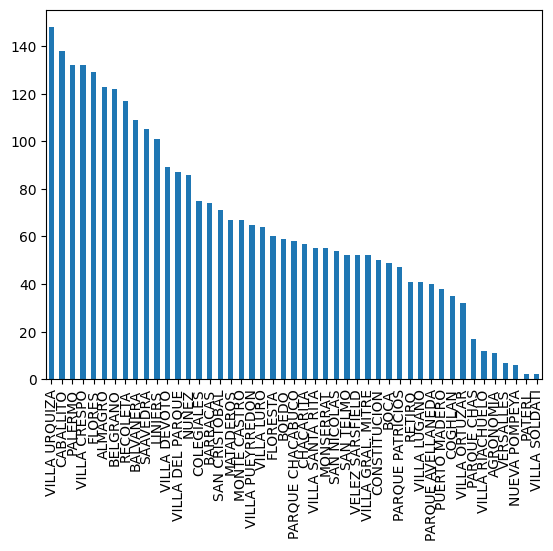

In [ ]:
inmuebles_barrio = inmuebles.BARRIO.value_counts()
inmuebles_barrio.plot.bar()

<Axes: >

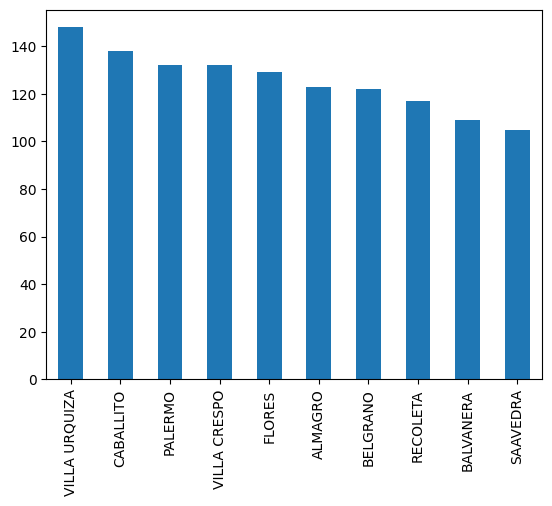

In [ ]:
inmuebles_barrio.head(10).plot.bar()

In [ ]:
inmuebles.describe()

,AÑO,TRIMESTRE,PRECIO_USD,AMBIENTES,COMUNA
count,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000
mean,2014.824635,2.438574,2276.490113,2.671961,8.514749
std,2.873248,1.114637,726.066058,0.469575,4.441089
min,2010.000000,1.000000,720.000000,2.000000,1.000000
25%,2012.000000,1.000000,1831.000000,2.000000,5.000000
50%,2016.000000,2.000000,2172.000000,3.000000,10.000000
75%,2017.000000,3.000000,2579.000000,3.000000,12.000000
max,2019.000000,4.000000,6487.000000,3.000000,15.000000


<Axes: ylabel='Frequency'>

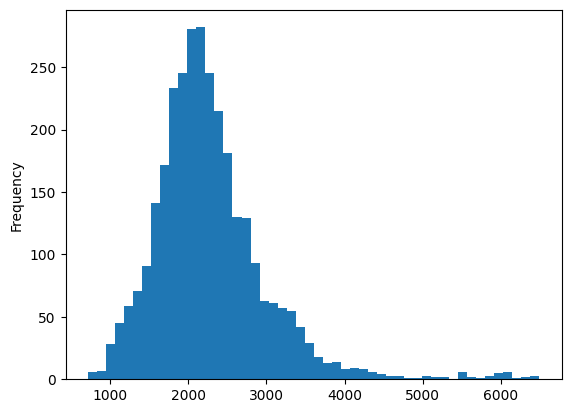

In [ ]:

inmuebles['PRECIO_USD'].plot.hist(bins=50)

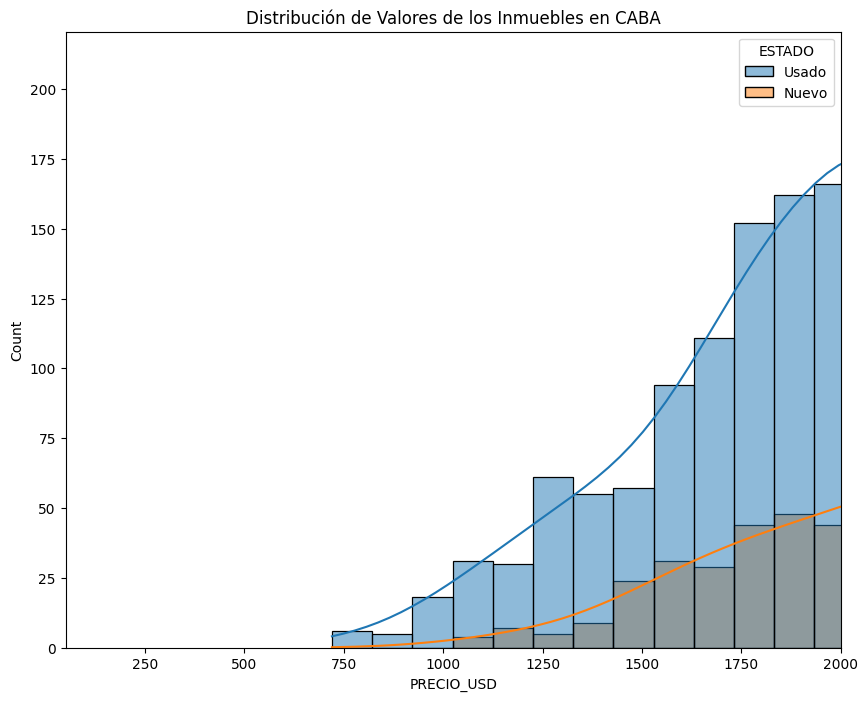

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='PRECIO_USD', kde=True, hue='ESTADO')
grafica.set_title('Distribución de Valores de los Inmuebles en CABA')
plt.xlim((50,2000))
plt.savefig('/content/valor_inmuebles.png',format='png')
plt.show()

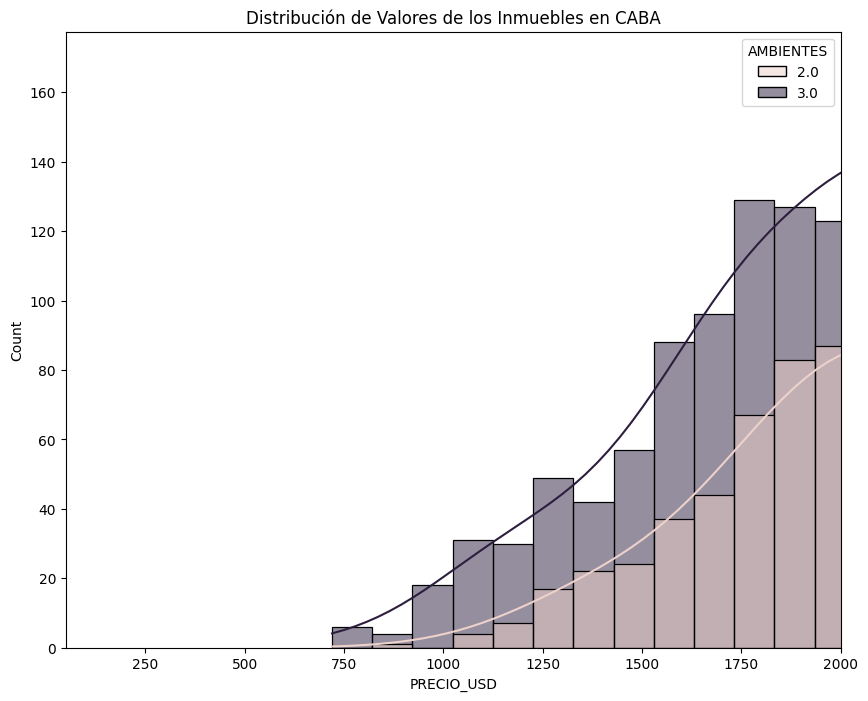

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='PRECIO_USD', kde=True, hue='AMBIENTES')
grafica.set_title('Distribución de Valores de los Inmuebles en CABA')
plt.xlim((50,2000))
plt.savefig('/content/valor_inmuebles.png',format='png')
plt.show()

In [ ]:
inmuebles.groupby('BARRIO').mean()

<ipython-input-115-27019772a352>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inmuebles.groupby('BARRIO').mean()


,AÑO,TRIMESTRE,PRECIO_USD,AMBIENTES,COMUNA
BARRIO,,,,,
AGRONOMIA,2016.363636,2.090909,2099.181818,2.363636,15.0
ALMAGRO,2014.430894,2.422764,2253.056911,2.691057,5.0
BALVANERA,2014.550459,2.412844,1900.899083,2.651376,3.0
BARRACAS,2013.878378,2.459459,1996.891892,2.621622,4.0
BELGRANO,2014.655738,2.426230,2901.311475,2.696721,13.0
BOCA,2014.755102,2.387755,1473.530612,2.510204,4.0
BOEDO,2015.966102,2.372881,2103.203390,2.644068,5.0
CABALLITO,2014.398551,2.456522,2350.152174,2.724638,6.0
CHACARITA,2015.175439,2.438596,2326.315789,2.631579,15.0


In [ ]:
inmuebles['BARRIO'] = pd.factorize(inmuebles['BARRIO'])[0]

In [ ]:
inmuebles['BARRIO'] = inmuebles['BARRIO'].astype(float)

In [ ]:
inmuebles.head()

,BARRIO,AÑO,TRIMESTRE,PRECIO_USD,AMBIENTES,ESTADO,COMUNA
0,0.0,2016.0,1.0,2018.0,2.0,Usado,15.0
1,0.0,2016.0,2.0,2032.0,2.0,Usado,15.0
2,0.0,2016.0,3.0,2095.0,2.0,Usado,15.0
3,0.0,2016.0,4.0,2052.0,2.0,Usado,15.0
4,0.0,2017.0,1.0,2140.0,2.0,Usado,15.0


In [ ]:
inmuebles['ESTADO'] = inmuebles['ESTADO'].replace({'Nuevo': 1, 'Usado': 2})

In [ ]:
inmuebles['ESTADO'] = inmuebles['ESTADO'].astype(float)

In [ ]:
correlation_matrix = inmuebles.corr()

In [ ]:
print(correlation_matrix)

              BARRIO       AÑO  TRIMESTRE  PRECIO_USD  AMBIENTES    ESTADO  \
BARRIO      1.000000 -0.003601   0.019836    0.004197   0.023689  0.005410   
AÑO        -0.003601  1.000000  -0.105876    0.547537  -0.045054  0.036189   
TRIMESTRE   0.019836 -0.105876   1.000000   -0.008737  -0.011252  0.022279   
PRECIO_USD  0.004197  0.547537  -0.008737    1.000000   0.016806 -0.218180   
AMBIENTES   0.023689 -0.045054  -0.011252    0.016806   1.000000 -0.465009   
ESTADO      0.005410  0.036189   0.022279   -0.218180  -0.465009  1.000000   
COMUNA      0.267409 -0.011753   0.018311    0.100529   0.074933 -0.136989   

              COMUNA  
BARRIO      0.267409  
AÑO        -0.011753  
TRIMESTRE   0.018311  
PRECIO_USD  0.100529  
AMBIENTES   0.074933  
ESTADO     -0.136989  
COMUNA      1.000000  


MATRIZ CORRELACIÓN

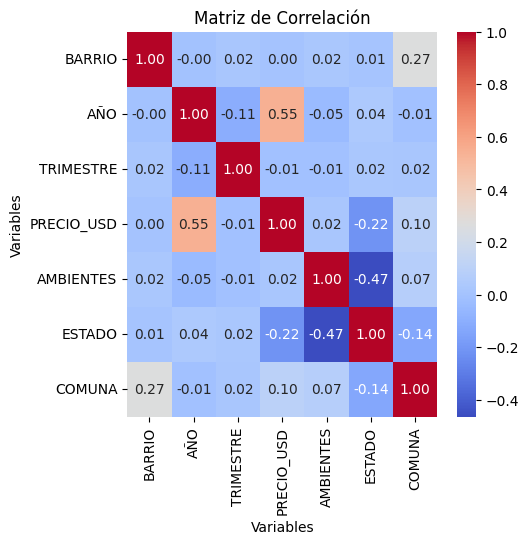

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura de tamaño adecuado
plt.figure(figsize=(5, 5))

# Utilizar seaborn para dibujar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir etiquetas a los ejes
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Matriz de Correlación')

# Mostrar la gráfica
plt.show()

In [ ]:
inmuebles.columns

Index(['BARRIO', 'AÑO', 'TRIMESTRE', 'PRECIO_USD', 'AMBIENTES', 'ESTADO',
       'COMUNA'],
      dtype='object')

CONSTRUCCION ALGORITMO

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
X = inmuebles[['BARRIO', 'AÑO', 'TRIMESTRE', 'AMBIENTES', 'ESTADO',
       'COMUNA']]

In [ ]:
y = inmuebles["PRECIO_USD"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 26)

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
X_test = X_test.to_numpy()

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
y_train = y_train.to_numpy()

In [ ]:
X_train.reshape(-1,1)

array([[2.900e+01],
       [2.017e+03],
       [2.000e+00],
       ...,
       [2.000e+00],
       [2.000e+00],
       [1.100e+01]])

In [ ]:
X_test.reshape(-1,1)

array([[2.000e+00],
       [2.011e+03],
       [1.000e+00],
       ...,
       [2.000e+00],
       [2.000e+00],
       [7.000e+00]])

In [ ]:
y_train.reshape(-1,1)

array([[2545.],
       [2118.],
       [1880.],
       ...,
       [1396.],
       [1750.],
       [2005.]])

In [ ]:
y_test.reshape(-1,1)

array([[1424.],
       [ 973.],
       [1516.],
       [1998.],
       [2060.],
       [2860.],
       [2294.],
       [2764.],
       [1349.],
       [2328.],
       [1300.],
       [1899.],
       [1568.],
       [2346.],
       [2582.],
       [1702.],
       [1606.],
       [1347.],
       [2431.],
       [2052.],
       [2105.],
       [2232.],
       [2082.],
       [4055.],
       [2402.],
       [1575.],
       [2491.],
       [2251.],
       [1847.],
       [2158.],
       [2021.],
       [2169.],
       [2192.],
       [2295.],
       [1831.],
       [3426.],
       [2127.],
       [2100.],
       [2388.],
       [1319.],
       [2346.],
       [2475.],
       [2127.],
       [1701.],
       [1720.],
       [2018.],
       [1656.],
       [1770.],
       [2354.],
       [2471.],
       [1435.],
       [2121.],
       [2003.],
       [2054.],
       [2361.],
       [2076.],
       [2416.],
       [2012.],
       [2312.],
       [2253.],
       [1674.],
       [1672.],
       [

In [ ]:
modelo_1 = LinearRegression()

In [ ]:
modelo_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict_test = modelo_1.predict(X_test)

In [ ]:
y_predict_train = modelo_1.predict(X_train)

In [ ]:
#Score del modelo en el conjunto de entrenamiento
score_in_train = modelo_1.score(X_train, y_train)

In [ ]:
print(score_in_train)

0.3842405162521356


In [ ]:
#Score del modelo en el conjunto de entrenamiento
score_in_test = modelo_1.score(X_test, y_test)

In [ ]:
print(score_in_test)

0.3316582411381561


In [ ]:
mae_test = mean_absolute_error(y_test, y_predict_test)

In [ ]:
r2_test = r2_score(y_test, y_predict_test)

In [ ]:
mae_train = mean_absolute_error(y_train, y_predict_train)

In [ ]:
r2_train = r2_score(y_train, y_predict_train)

In [ ]:
print(mae_test,r2_test)
print(mae_train,r2_train)

388.3327613889401 0.3316582411381561
383.68659000972747 0.3842405162521356


In [ ]:
import xgboost as xgb

In [ ]:
modelo_2 = xgb.XGBRegressor(random_state=26,n_estimators=500, learning_rate=0.05, n_jobs=4)
modelo_2.fit(X_train, y_train, early_stopping_rounds=9,
             eval_set=[(X_test,y_test)],
             verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=4,
             num_parallel_tree=None, random_state=26, ...)

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = modelo_2.predict(X_test)

In [ ]:
#Score del modelo en el conjunto de entrenamiento
score_in_train = modelo_2.score(X_train, y_train)

In [ ]:
print(score_in_train)

0.9869280497148848


In [ ]:
#Score del modelo en el conjunto de entrenamiento
score_in_test = modelo_2.score(X_test, y_test)

In [ ]:
print(score_in_test)

0.977241487261688


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 12456.607543844406
Mean Absolute Error (MAE): 82.41684663604578


In [ ]:
r2_test = r2_score(y_test,predictions)

In [ ]:
print(r2_test)

0.977241487261688


In [ ]:
predictions

array([1431.2695, 1048.0005, 1488.5138, 1938.1415, 1967.1189, 2883.5588,
       2301.3906, 2705.231 , 1471.0248, 2333.024 , 1221.1853, 1930.191 ,
       1534.9257, 2259.3315, 2471.5063, 1760.9109, 1716.1332, 1380.4797,
       2252.273 , 2187.8777, 2119.71  , 2089.0693, 2112.8147, 4177.4927,
       2459.4338, 1719.822 , 2379.4011, 2170.2456, 2069.389 , 2088.125 ,
       2035.3569, 2003.4299, 1979.4404, 2297.1743, 1776.8434, 3400.1619,
       2314.8718, 2080.7327, 2590.2546, 1321.3633, 2328.2915, 2403.005 ,
       2008.7501, 1648.6738, 1938.1178, 2068.3484, 1618.362 , 1943.9313,
       2363.3127, 2386.9414, 1384.9961, 1966.5056, 1791.1996, 2201.3271,
       2421.8875, 2022.6039, 2268.001 , 2072.7593, 2445.7202, 2246.1353,
       1468.5741, 1734.0332, 1690.9629, 1999.8197, 2284.0486, 1715.7941,
       1311.928 , 2351.437 , 2346.2043, 2095.3923, 2510.8152, 1805.5625,
       2355.0837, 1559.8336, 4035.3716, 2236.4058, 2223.6846, 2301.5315,
       1730.7892, 1774.0349, 2194.3347, 2070.061 , 

IMPLEMENTACIÓN

In [ ]:
data_real = {
    'BARRIO': [1.0, 2.0, 3.0, 4.0, 5.0],  # Ejemplo de valores para la columna BARRIO
    'AÑO': [2010.0, 2019.0, 2018.0, 2021.0, 2017.0],  # Ejemplo de valores para la columna AÑO
    'TRIMESTRE': [1.0, 2.0, 2.0, 4.0, 4.0],  # Ejemplo de valores para la columna TRIMESTRE
    'PRECIO_USD': [1574.0, 2272.0, 2536.0, 3450.0, 1694.0],  # Ejemplo de valores para la columna PRECIO_USD
    'AMBIENTES': [2.0, 2.0, 2.0, 2.0, 2.0],  # Ejemplo de valores para la columna AMBIENTES
    'ESTADO': [2.0, 2.0, 2.0, 2.0, 2.0],  # Ejemplo de valores para la columna ESTADO
    'COMUNA': [5.0, 3.0, 4.0, 13.0, 4.0]  # Ejemplo de valores para la columna COMUNA
}

In [ ]:
# Crear un diccionario con datos de prueba
data = {
    'BARRIO': [1.0, 2.0, 3.0, 4.0, 5.0],  # Ejemplo de valores para la columna BARRIO
    'AÑO': [2010.0, 2019.0, 2018.0, 2021.0, 2017.0],  # Ejemplo de valores para la columna AÑO
    'TRIMESTRE': [1.0, 2.0, 2.0, 4.0, 4.0],  # Ejemplo de valores para la columna TRIMESTRE
    'AMBIENTES': [2.0, 2.0, 2.0, 2.0, 2.0],  # Ejemplo de valores para la columna AMBIENTES
    'ESTADO': [2.0, 2.0, 2.0, 2.0, 2.0],  # Ejemplo de valores para la columna ESTADO
    'COMUNA': [5.0, 3.0, 4.0, 13.0, 4.0]  # Ejemplo de valores para la columna COMUNA
}

# Crear un DataFrame de pandas con el diccionario de datos
df_test = pd.DataFrame(data)

# Verificar el nuevo conjunto de datos de prueba
print(df_test)

   BARRIO     AÑO  TRIMESTRE  AMBIENTES  ESTADO  COMUNA
0     1.0  2010.0        1.0        2.0     2.0     5.0
1     2.0  2019.0        2.0        2.0     2.0     3.0
2     3.0  2018.0        2.0        2.0     2.0     4.0
3     4.0  2021.0        4.0        2.0     2.0    13.0
4     5.0  2017.0        4.0        2.0     2.0     4.0


In [ ]:
predictions_new = modelo_2.predict(df_test)

In [ ]:
df_predictions_new = pd.DataFrame(predictions_new, columns = ["Prediction"])

In [ ]:
print(df_predictions_new)

    Prediction
0  1554.184692
1  2267.784180
2  2468.798584
3  3529.162842
4  1717.868896


In [ ]:
precios_usd = data_real['PRECIO_USD']

In [ ]:
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(precios_usd, df_predictions_new)
print("Mean Squared Error (MSE):", mse)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(precios_usd, df_predictions_new)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 2352.5859224230053
Mean Absolute Error (MAE): 38.8528564453125


In [ ]:
r2_test_2 = r2_score(precios_usd, df_predictions_new)

In [ ]:
print(r2_test_2)

0.9948252889496603
